In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/features_status2.csv')

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       'fname', 'status', 'cough_detected'],
      dtype='object')

In [5]:
ndf = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'fname','status'])

In [6]:
def convert_to_yes_no(value):
    return 'Yes' if value > 0.5 else 'No'

# Apply the function to the DataFrame
converted_ndf = ndf.copy()
converted_ndf["cough_detected_classes"] = ndf["cough_detected"].apply(convert_to_yes_no)

In [7]:
converted_ndf.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,cough_detected,cough_detected_classes
0,125.0,119.0,123.0,126.0,117.0,123.0,132.0,130.0,133.0,123.0,...,0.418935,0.018719,0.002649,0.009519,0.007946,0.008674,0.000282,4.660244e-07,0.1105,No
1,29.0,26.0,31.0,32.0,31.0,28.0,28.0,29.0,33.0,29.0,...,0.807563,0.000921,0.006751,0.000555,0.000980,0.000088,0.000034,4.643915e-08,0.1291,No
2,121.0,127.0,124.0,118.0,125.0,125.0,117.0,120.0,122.0,121.0,...,0.680348,0.061383,0.009588,0.007578,0.010005,0.001217,0.000245,3.035675e-06,0.6641,Yes
3,160.0,164.0,159.0,161.0,156.0,161.0,166.0,161.0,161.0,159.0,...,0.268773,0.137792,0.117498,0.050227,0.028755,0.005817,0.002255,9.670836e-05,0.8601,Yes
4,127.0,120.0,111.0,119.0,111.0,119.0,115.0,108.0,125.0,125.0,...,0.031995,0.193475,0.034794,0.031106,0.128342,0.000158,0.000482,1.689571e-06,0.0314,No


In [8]:
converted_ndf.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
from pycaret.classification import *

# Load your data (replace 'your_data.csv' with your file)


# Set up PyCaret with handling missing values
exp = setup(converted_ndf, target='cough_detected_classes' ,session_id=123, preprocess=True, use_gpu=True)



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0


In [10]:
best_model = compare_models(exclude=['lightgbm', 'catboost', 'mlp'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:10:52
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9999,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998,0.1760
rf,Random Forest Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9997,0.9997,0.6330
ada,Ada Boost Classifier,0.9999,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998,0.1850
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998,11.7270
ridge,Ridge Classifier,0.9946,0.0000,0.9946,0.9947,0.9947,0.9881,0.9881,0.0860
lda,Linear Discriminant Analysis,0.9942,0.9999,0.9942,0.9942,0.9942,0.9871,0.9871,0.2320
et,Extra Trees Classifier,0.9909,0.9997,0.9909,0.9909,0.9909,0.9797,0.9797,0.5160
qda,Quadratic Discriminant Analysis,0.9324,0.9844,0.9324,0.9327,0.9316,0.8456,0.8476,0.1570
lr,Logistic Regression,0.8816,0.9431,0.8816,0.8808,0.8797,0.7277,0.7307,0.7780
nb,Naive Bayes,0.7296,0.8065,0.7296,0.7183,0.7134,0.3428,0.3563,0.0730


In [13]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# ID of an estimator available in model library or pass an untrained model object consistent with scikit-learn API. Estimators available in the model library (ID - Name):

# ‘lr’ - Logistic Regression

# ‘knn’ - K Neighbors Classifier

# ‘nb’ - Naive Bayes

# ‘dt’ - Decision Tree Classifier

# ‘svm’ - SVM - Linear Kernel

# ‘rbfsvm’ - SVM - Radial Kernel

# ‘gpc’ - Gaussian Process Classifier

# ‘mlp’ - MLP Classifier

# ‘ridge’ - Ridge Classifier

# ‘rf’ - Random Forest Classifier

# ‘qda’ - Quadratic Discriminant Analysis

# ‘ada’ - Ada Boost Classifier

# ‘gbc’ - Gradient Boosting Classifier

# ‘lda’ - Linear Discriminant Analysis

# ‘et’ - Extra Trees Classifier

# ‘xgboost’ - Extreme Gradient Boosting

# ‘lightgbm’ - Light Gradient Boosting Machine

# ‘catboost’ - CatBoost Classifier

In [16]:
dt= create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9993,0.9989,0.9993,0.9993,0.9993,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [17]:
tuned_dt= tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:16:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9993,0.9989,0.9993,0.9993,0.9993,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


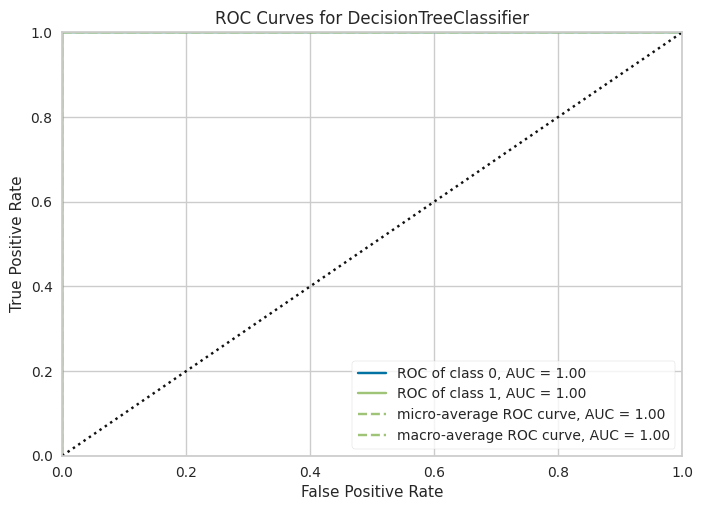

In [18]:
plot_model(tuned_dt, plot = 'auc')

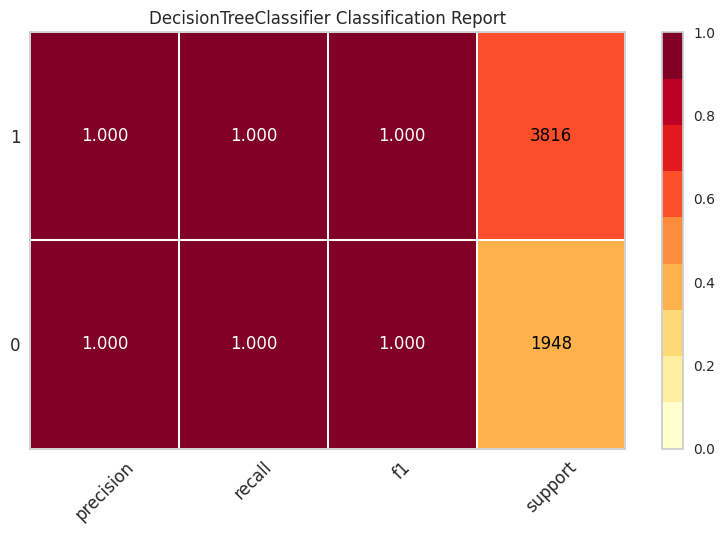

In [24]:
plot_model(tuned_dt, plot = 'class_report')

In [1]:
plot_model(tuned_dt, plot = 'confusion_matrix')

NameError: name 'plot_model' is not defined

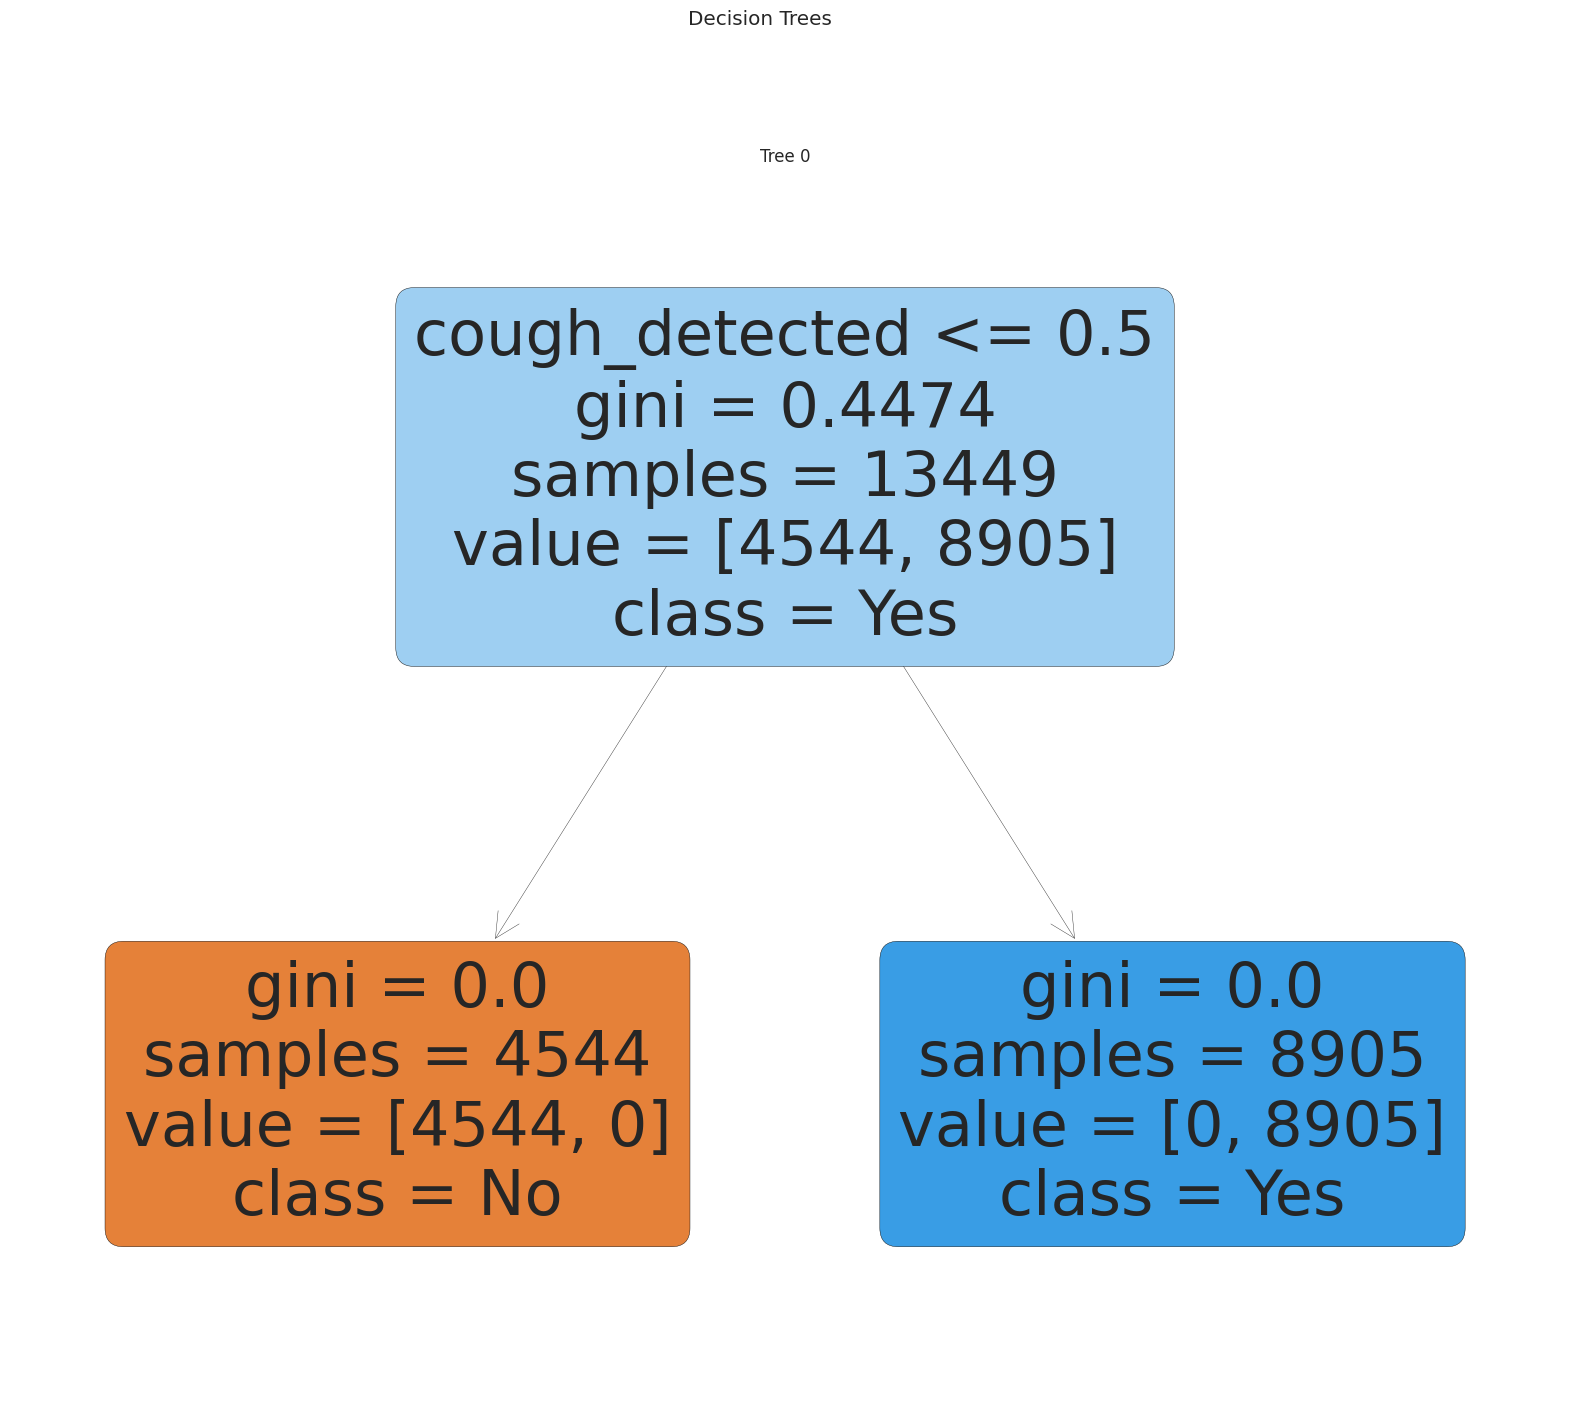

In [25]:
plot_model(tuned_dt, plot = 'tree')

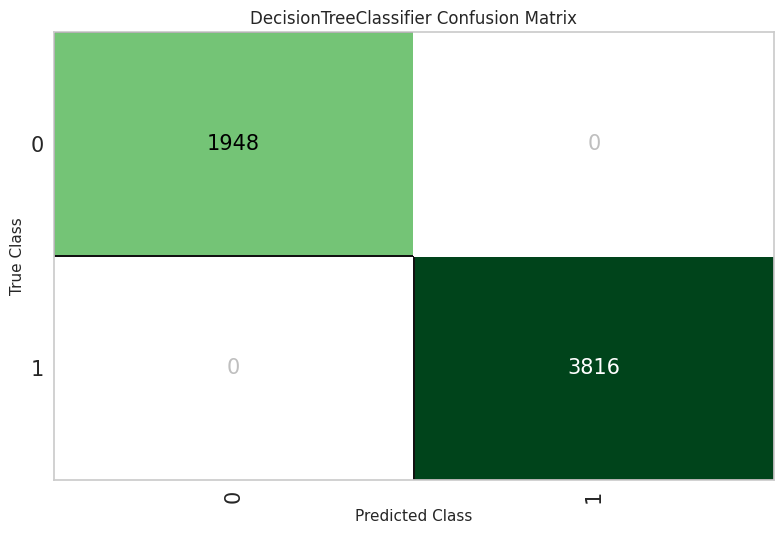

In [26]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [ ]:
# 'List of available plots (ID - Name):

# ‘pipeline’ - Schematic drawing of the preprocessing pipeline

# ‘auc’ - Area Under the Curve

# ‘threshold’ - Discrimination Threshold

# ‘pr’ - Precision Recall Curve

# ‘confusion_matrix’ - Confusion Matrix

# ‘error’ - Class Prediction Error

# ‘class_report’ - Classification Report

# ‘boundary’ - Decision Boundary

# ‘rfe’ - Recursive Feature Selection

# ‘learning’ - Learning Curve

# ‘manifold’ - Manifold Learning

# ‘calibration’ - Calibration Curve

# ‘vc’ - Validation Curve

# ‘dimension’ - Dimension Learning

# ‘feature’ - Feature Importance

# ‘feature_all’ - Feature Importance (All)

# ‘parameter’ - Model Hyperparameter

# ‘lift’ - Lift Curve

# ‘gain’ - Gain Chart

# ‘tree’ - Decision Tree

# ‘ks’ - KS Statistic Plot'

In [27]:
final_rf = finalize_model(tuned_dt)

In [30]:
save_model(final_rf, 'saved_dt_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29',...
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 

In [31]:
from pycaret.classification import load_model
saved_dt = load_model('saved_dt_model')

Transformation Pipeline and Model Successfully Loaded


In [32]:
# pred_holdout = predict_model(saved_dt)
# pred_unseen = predict_model(saved_dt, data = pd.DataFrame())

In [36]:
# dashboard(saved_dt)